In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 22})

In [2]:
# Creating the data (function) whose derivative is to be computed by FFT

n = 64
L = 30
dx = L/n
x = np.arange(-L/2,L/2,dx,dtype='complex_')
f = np.cos(x) * np.exp(-np.power(x,2)/25)                 # Function = cosx * e^(-(x^2)/25)
df = -np.sin(x) * np.exp(-np.power(x,2)/25) - (2*x*f)/25  # Derivative of Function = -sinx * e^(-(x^2)/25) - 2*x*f/25


In [8]:
# Approximate derivative using finite difference method

df_fd = np.zeros(len(df),dtype = 'complex_')
for kappa in range(len(df)-1):
    df_fd[kappa] = (f[kappa+1] - f[kappa])/dx   # f_hat_k =(f_k+1 - f_k)/delta_x
df_fd[-1] = df_fd[-2]

In [10]:
# Derivative using FFT(spectral derivative)

f_hat = np.fft.fft(f)
kappa = (2*np.pi/L)*np.arange(-n/2,n/2) # Reorder fft sequence
kappa = np.fft.fftshift(kappa)
df_hat = kappa * f_hat *(1j) 
dfFFT = np.real(np.fft.ifft(df_hat))

/home/sidrag/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sidrag/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sidrag/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sidrag/.local/lib/python3.8/site-packages/matplotlib/transforms.py:2817: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


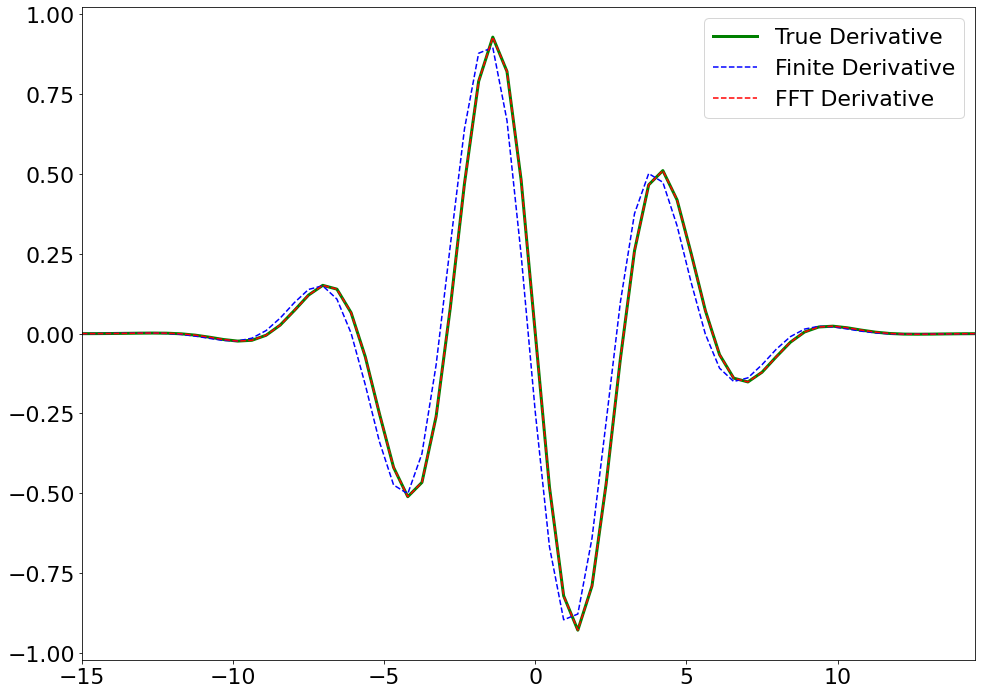

In [16]:

plt.plot(x,df.real,color='g',LineWidth=3,label='True Derivative')
plt.plot(x, df_fd.real, '--',  color='b', LineWidth=1.5 ,label='Finite Derivative')
plt.plot(x, dfFFT.real, '--',  color='r', LineWidth=1.5 ,label='FFT Derivative')

plt.xlim(x[0],x[-1])
plt.legend()
plt.show()